In [13]:
from src.visualizer import visualize_dataset, visualize_dataloader, visualize_results
from src.loops import ModelTrainer
from src.Data.get_dataset import download_VOC
from src.Data.get_dataloader import get_dataloader 
from src.models.resnet_image import ResNet6_images, ResidualBlock
from src.utils.dice_loss import dice_loss
from src.models.node_image import ODENet
from src.models.rknet_image import RKNet

In [14]:
voc_trainset, voc_valset = download_VOC()

Using downloaded and verified file: C:\Users\tobia\Documents\GitHub\DL4SC_Neural_ODEs\Image_segmentation\src\Data\data_set\VOCtrainval_11-May-2012.tar
Extracting C:\Users\tobia\Documents\GitHub\DL4SC_Neural_ODEs\Image_segmentation\src\Data\data_set\VOCtrainval_11-May-2012.tar to C:\Users\tobia\Documents\GitHub\DL4SC_Neural_ODEs\Image_segmentation\src\Data\data_set
Using downloaded and verified file: C:\Users\tobia\Documents\GitHub\DL4SC_Neural_ODEs\Image_segmentation\src\Data\data_set\VOCtrainval_11-May-2012.tar
Extracting C:\Users\tobia\Documents\GitHub\DL4SC_Neural_ODEs\Image_segmentation\src\Data\data_set\VOCtrainval_11-May-2012.tar to C:\Users\tobia\Documents\GitHub\DL4SC_Neural_ODEs\Image_segmentation\src\Data\data_set


In [15]:
verbose = True
load = False
run_tasks = True
save = True

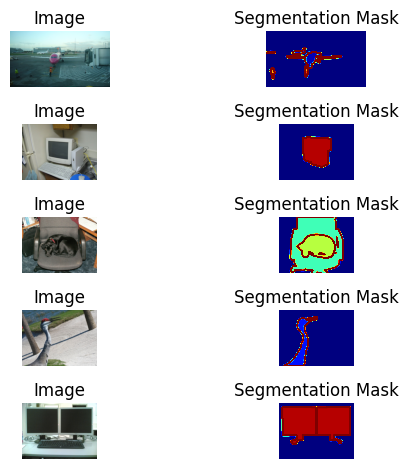

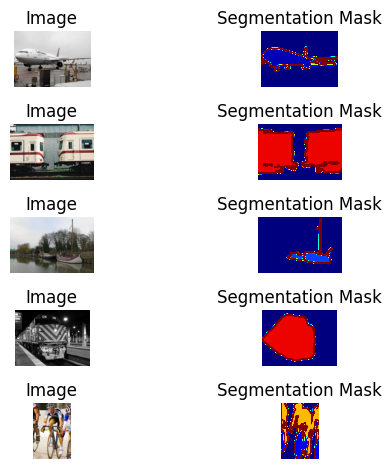

In [16]:
if verbose:
    visualize_dataset(voc_trainset)
    visualize_dataset(voc_valset)

In [17]:
voc_train_loader = get_dataloader(voc_trainset)
voc_val_loader = get_dataloader(voc_valset)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


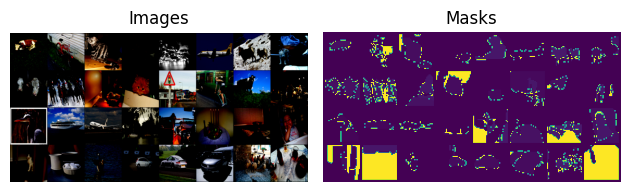

images shape:  torch.Size([32, 3, 256, 256])
masks shape:  torch.Size([32, 1, 32, 32])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


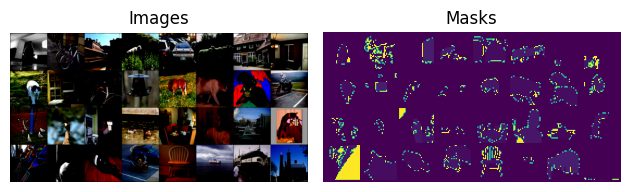

images shape:  torch.Size([32, 3, 256, 256])
masks shape:  torch.Size([32, 1, 32, 32])


In [18]:
if verbose:
    visualize_dataloader(voc_train_loader)
    visualize_dataloader(voc_val_loader)

In [19]:
import os
in_channels = 3
model_resnet = ResNet6_images(in_channels)
model_node = ODENet(in_channels)
model_rknet = RKNet(in_channels)
lossf = dice_loss
learning_rate = 0.0001
num_epochs = 50
print_interval = 25
model_filepath =  os.path.join(os.getcwd(), "src\\model_trained\\" ) 

In [20]:
trainer_resnet = ModelTrainer(voc_train_loader, voc_val_loader, model_resnet, lossf, learning_rate, num_epochs, print_interval, os.path.join(model_filepath, "resnet.pt" ))
trainer_node = ModelTrainer(voc_train_loader, voc_val_loader, model_node, lossf, learning_rate, num_epochs, print_interval, os.path.join(model_filepath, "node.pt"))
trainer_rknet = ModelTrainer(voc_train_loader, voc_val_loader, model_rknet, lossf, learning_rate, num_epochs, print_interval, os.path.join(model_filepath, "rknet.pt"))

In [21]:
if load:
    trainer_resnet.load_model()
    trainer_node.load_model()
    trainer_rknet.load_model()

In [22]:
if run_tasks:
    for cur_model in [trainer_resnet, trainer_node, trainer_rknet]:
        cur_model.train()
        if save:
            cur_model.save_model()

Epoch [1/200], Evaluation [25/46], Loss: 0.8145039319992066
Epoch [1/200], Evaluation [46/46], Loss: 0.7734665501685369
Epoch [2/200], Evaluation [25/46], Loss: 0.7343843317031861
Epoch [2/200], Evaluation [46/46], Loss: 0.7073436776796976
Epoch [3/200], Evaluation [25/46], Loss: 0.6824276280403138
Epoch [3/200], Evaluation [46/46], Loss: 0.6482629293487185
Epoch [4/200], Evaluation [25/46], Loss: 0.6449071645736695
Epoch [4/200], Evaluation [46/46], Loss: 0.6158347385270255
Epoch [5/200], Evaluation [25/46], Loss: 0.5979305839538575
Epoch [5/200], Evaluation [46/46], Loss: 0.6080208165305001
Epoch [6/200], Evaluation [25/46], Loss: 0.5752489471435547
Epoch [6/200], Evaluation [46/46], Loss: 0.5815871244385129
Epoch [7/200], Evaluation [25/46], Loss: 0.5538852787017823
Epoch [7/200], Evaluation [46/46], Loss: 0.5519372111275083
Epoch [8/200], Evaluation [25/46], Loss: 0.520784854888916
Epoch [8/200], Evaluation [46/46], Loss: 0.5493016384896778
Epoch [9/200], Evaluation [25/46], Loss: 

In [23]:
if run_tasks:
    trainer_resnet.test()
    trainer_node.test() 
    trainer_rknet.test()

Test avg dice loss: 0.49%
Test avg dice loss: 0.45%
Test avg dice loss: 0.45%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


resnet


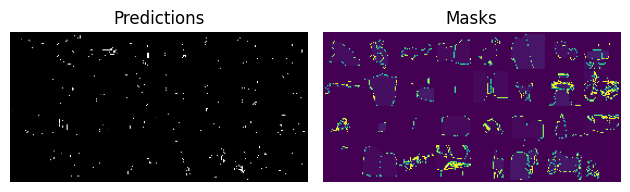

----------------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


node


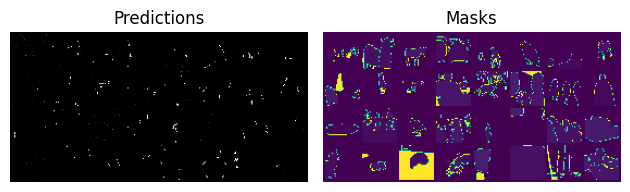

----------------------------


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


rknet


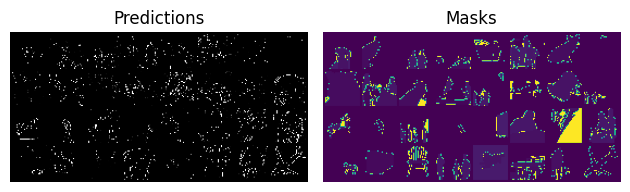

----------------------------


In [24]:
if verbose:
    predicts, masks = trainer_resnet.predict()
    print("resnet")
    visualize_results(predicts, masks)
    print("----------------------------")

    predicts, masks = trainer_node.predict()
    print("node")
    visualize_results(predicts, masks)
    print("----------------------------")

    predicts, masks = trainer_rknet.predict()
    print("rknet")
    visualize_results(predicts, masks)
    print("----------------------------")